In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#precision_score
from sklearn.metrics import precision_score
#recall_score
from sklearn.metrics import recall_score
#f1_score
from sklearn.metrics import f1_score
#support
from sklearn.metrics import classification_report

In [2]:
#data loading
df=pd.read_csv("creditcard.csv")

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above output, this dataset is deeply imbalanced. In addition, with so many features, there are some hidden patterns that existing detection didn't capture. Therefore, it is necessary to relabel the dataset.

In [4]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [5]:
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)

In [6]:
x=df.drop(["Class"],axis=1)
y=df['Class']

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The above output is interest as it demonstrates that according to the existing data, there are so many transactions that should have been flagged

After relabelling, using festure engineering to select relevant features is paramount

### Correlation

<AxesSubplot:>

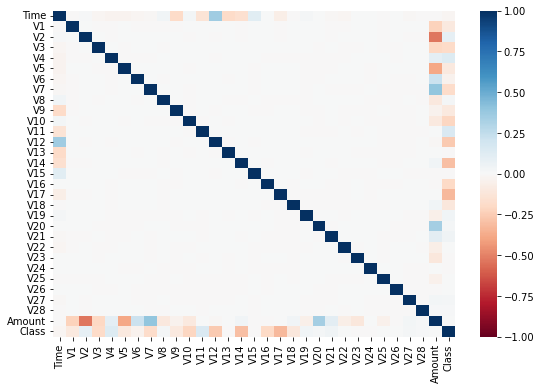

In [8]:
x_corr = df.drop(['Class'], axis=1)
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1)

In [9]:
correlation_matrix=df.corr()
corr_feature_lst=abs(correlation_matrix.iloc[:,-1]).sort_values(ascending=False)

In [10]:
corr_feature_lst

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.017082
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [11]:
selected_10_features_from_corr=list(corr_feature_lst.index)[1:11]

In [12]:
selected_10_features_from_corr

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']

The above gives ranks on the importance of different features. However, correlation only indicates linear relationships.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
ndf=df.copy()

In [15]:
x=ndf.drop("Class",axis=1)
y=ndf["Class"]

In [17]:
from pandas.core.common import random_state
rf=RandomForestClassifier(random_state=42)
rf.fit(x,y)

KeyboardInterrupt: 

In [ ]:
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances

In [ ]:
#select top 10 performed features as the features below tend to perform worse
selected_features_rf=x.columns[importances.argsort()[::-1][:10]].tolist()

In [ ]:
selected_features_rf

Generally, the features revealed from Random Forest are more convincing as it takes linear and nonlinear relationship into consideration

### Train Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
#xgboost
from xgboost import XGBClassifier

For loop

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_nonF = df[df['Class'] == 0]
df_F = df[df['Class'] == 1]

In [21]:
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [76]:
acc_lgr = []
precision_lgr = []
recall_lgr = []
f1_lgr = []
for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    lgr = LogisticRegression(solver='liblinear')
    lgr.fit(x_train, y_train)
    y_pred = lgr.predict(x_test)
    acc_lgr.append(accuracy_score(y_test, y_pred))
    precision_lgr.append(precision_score(y_test, y_pred))
    recall_lgr.append(recall_score(y_test, y_pred))
    f1_lgr.append(f1_score(y_test, y_pred))

In [77]:
acc_lgr1 = []
precision_lgr1 = []
recall_lgr1 = []
f1_lgr1 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_lgr1.append(accuracy_score(y_test, y_pred))
    precision_lgr1.append(precision_score(y_test, y_pred))
    recall_lgr1.append(recall_score(y_test, y_pred))
    f1_lgr1.append(f1_score(y_test, y_pred))

In [78]:
acc_lgr2 = []
precision_lgr2 = []
recall_lgr2 = []
f1_lgr2 = []

for i in range(100):
    df_sample = df_nonF.sample(n=1000)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_lgr2.append(accuracy_score(y_test, y_pred))
    precision_lgr2.append(precision_score(y_test, y_pred))
    recall_lgr2.append(recall_score(y_test, y_pred))
    f1_lgr2.append(f1_score(y_test, y_pred))

Random Forest

In [79]:
acc_rf = []
precision_rf = []
recall_rf = []
f1_rf = []

for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_rf.append(accuracy_score(y_test, y_pred))
    precision_rf.append(precision_score(y_test, y_pred))
    recall_rf.append(recall_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred))

In [80]:
acc_rf1 = []
precision_rf1 = []
recall_rf1 = []
f1_rf1 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_rf1.append(accuracy_score(y_test, y_pred))
    precision_rf1.append(precision_score(y_test, y_pred))
    recall_rf1.append(recall_score(y_test, y_pred))
    f1_rf1.append(f1_score(y_test, y_pred))

In [81]:
acc_rf2 = []
precision_rf2 = []
recall_rf2 = []
f1_rf2 = []

for i in range(100):
    df_sample = df_nonF.sample(n=1000)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_rf2.append(accuracy_score(y_test, y_pred))
    precision_rf2.append(precision_score(y_test, y_pred))
    recall_rf2.append(recall_score(y_test, y_pred))
    f1_rf2.append(f1_score(y_test, y_pred))

Xgboost

In [82]:
acc_xgb = []
precision_xgb = []
recall_xgb = []
f1_xgb = []

for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    xgb = XGBClassifier(objective='reg:squarederror', n_estimators=20, seed=123)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    acc_xgb.append(accuracy_score(y_test, y_pred))
    precision_xgb.append(precision_score(y_test, y_pred))
    recall_xgb.append(recall_score(y_test, y_pred))
    f1_xgb.append(f1_score(y_test, y_pred))

In [83]:
acc_xgb1 = []
precision_xgb1 = []
recall_xgb1 = []
f1_xgb1 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_xgb1.append(accuracy_score(y_test, y_pred))
    precision_xgb1.append(precision_score(y_test, y_pred))
    recall_xgb1.append(recall_score(y_test, y_pred))
    f1_xgb1.append(f1_score(y_test, y_pred))

In [96]:
acc_xgb2 = []
precision_xgb2 = []
recall_xgb2 = []
f1_xgb2 = []

for i in range(100):
    df_sample = df_nonF.sample(n=1000)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_xgb2.append(accuracy_score(y_test, y_pred))
    precision_xgb2.append(precision_score(y_test, y_pred))
    recall_xgb2.append(recall_score(y_test, y_pred))
    f1_xgb2.append(f1_score(y_test, y_pred))

Decision Tree

In [85]:
acc_dt = []
precision_dt = []
recall_dt = []
f1_dt = []

for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.13, random_state=3)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    acc_dt.append(accuracy_score(y_test, y_pred))
    precision_dt.append(precision_score(y_test, y_pred))
    recall_dt.append(recall_score(y_test, y_pred))
    f1_dt.append(f1_score(y_test, y_pred))
    

In [86]:
acc_dt1 = []
precision_dt1 = []
recall_dt1 = []
f1_dt1 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_dt1.append(accuracy_score(y_test, y_pred))
    precision_dt1.append(precision_score(y_test, y_pred))
    recall_dt1.append(recall_score(y_test, y_pred))
    f1_dt1.append(f1_score(y_test, y_pred))

In [87]:
acc_dt2 = []
precision_dt2 = []
recall_dt2 = []
f1_dt2 = []

for i in range(100):
    df_sample = df_nonF.sample(n=1000)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_dt2.append(accuracy_score(y_test, y_pred))
    precision_dt2.append(precision_score(y_test, y_pred))
    recall_dt2.append(recall_score(y_test, y_pred))
    f1_dt2.append(f1_score(y_test, y_pred))

Neural Network

In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
acc_nn = []
precision_nn = []
recall_nn = []
f1_nn = []

for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    nn = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,activation='relu',solver='adam',random_state=1)
    nn.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    acc_nn.append(accuracy_score(y_test, y_pred))
    precision_nn.append(precision_score(y_test, y_pred))
    recall_nn.append(recall_score(y_test, y_pred))
    f1_nn.append(f1_score(y_test, y_pred))

In [90]:
acc_nn1 = []
precision_nn1 = []
recall_nn1 = []
f1_nn1 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_nn1.append(accuracy_score(y_test, y_pred))
    precision_nn1.append(precision_score(y_test, y_pred))
    recall_nn1.append(recall_score(y_test, y_pred))
    f1_nn1.append(f1_score(y_test, y_pred))

In [91]:
acc_nn2 = []
precision_nn2 = []
recall_nn2 = []
f1_nn2 = []

for i in range(100):
    df_sample = df_nonF.sample(n=250)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_nn2.append(accuracy_score(y_test, y_pred))
    precision_nn2.append(precision_score(y_test, y_pred))
    recall_nn2.append(recall_score(y_test, y_pred))
    f1_nn2.append(f1_score(y_test, y_pred))

In [98]:
acc = pd.DataFrame(acc_lgr, columns=['Logistic Regression'])
acc['Random Forest'] = acc_rf
acc['XGBOOST'] = acc_xgb
acc['Decision Tree'] = acc_dt
acc['Neural Network'] = acc_nn
acc

,Logistic Regression,Random Forest,XGBOOST,Decision Tree,Neural Network
0,0.952703,0.935811,0.949324,0.925676,0.929054
1,0.945946,0.949324,0.929054,0.929054,0.942568
2,0.939189,0.935811,0.939189,0.915541,0.908784
3,0.922297,0.925676,0.891892,0.908784,0.915541
4,0.945946,0.942568,0.939189,0.925676,0.905405
...,...,...,...,...,...
95,0.942568,0.939189,0.932432,0.925676,0.949324
96,0.929054,0.939189,0.932432,0.929054,0.912162
97,0.939189,0.918919,0.918919,0.918919,0.932432
98,0.939189,0.925676,0.929054,0.908784,0.908784


In [99]:
acc1 = pd.DataFrame(acc_lgr1, columns=['Logistic Regression'])
acc1['Random Forest'] = acc_rf1
acc1['XGBOOST'] = acc_xgb1
acc1['Decision Tree'] = acc_dt1
acc1['Neural Network'] = acc_nn1
acc1

,Logistic Regression,Random Forest,XGBOOST,Decision Tree,Neural Network
0,0.923767,0.914798,0.919283,0.959641,0.946188
1,0.896861,0.914798,0.923767,0.946188,0.932735
2,0.919283,0.905830,0.914798,0.932735,0.928251
3,0.919283,0.937220,0.919283,0.932735,0.919283
4,0.928251,0.937220,0.937220,0.941704,0.910314
...,...,...,...,...,...
95,0.905830,0.937220,0.937220,0.937220,0.937220
96,0.950673,0.919283,0.937220,0.919283,0.928251
97,0.946188,0.950673,0.932735,0.937220,0.946188
98,0.923767,0.946188,0.914798,0.959641,0.950673


In [100]:
acc2 = pd.DataFrame(acc_lgr2, columns=['Logistic Regression'])
acc2['Random Forest'] = acc_rf2
acc2['XGBOOST'] = acc_xgb2
acc2['Decision Tree'] = acc_dt2
acc2['Neural Network'] = acc_nn2
acc2

,Logistic Regression,Random Forest,XGBOOST,Decision Tree,Neural Network
0,0.968750,0.946429,0.955357,0.973214,0.914798
1,0.966518,0.948661,0.957589,0.953125,0.941704
2,0.939732,0.959821,0.955357,0.948661,0.941704
3,0.962054,0.955357,0.948661,0.957589,0.946188
4,0.957589,0.964286,0.955357,0.937500,0.910314
...,...,...,...,...,...
95,0.944196,0.959821,0.939732,0.955357,0.910314
96,0.957589,0.957589,0.959821,0.957589,0.941704
97,0.962054,0.950893,0.959821,0.962054,0.910314
98,0.946429,0.950893,0.953125,0.970982,0.941704


In [109]:
acc_mean = acc.mean()
acc1_mean = acc1.mean()
acc2_mean = acc2.mean()

In [38]:
precision = pd.DataFrame(precision_lgr, columns=['Logistic Regression'])
precision['Random Forest'] = precision_rf
precision['XGBOOST'] = precision_xgb
precision['Decision Tree'] = precision_dt
precision['Neural Network'] = precision_nn
precision_mean = precision.mean()

In [101]:
precision1 = pd.DataFrame(precision_lgr1, columns=['Logistic Regression'])
precision1['Random Forest'] = precision_rf1
precision1['XGBOOST'] = precision_xgb1
precision1['Decision Tree'] = precision_dt1
precision1['Neural Network'] = precision_nn1
precision1_mean = precision1.mean()

In [102]:
precision2 = pd.DataFrame(precision_lgr2, columns=['Logistic Regression'])
precision2['Random Forest'] = precision_rf2
precision2['XGBOOST'] = precision_xgb2
precision2['Decision Tree'] = precision_dt2
precision2['Neural Network'] = precision_nn2
precision2_mean = precision2.mean()

In [103]:
precision_mean = precision.mean()
precision1_mean = precision1.mean()
precision2_mean = precision2.mean()

In [39]:
recall = pd.DataFrame(recall_lgr, columns=['Logistic Regression'])
recall['Random Forest'] = recall_rf
recall['XGBOOST'] = recall_xgb
recall['Decision Tree'] = recall_dt
recall['Neural Network'] = recall_nn
recall_mean = recall.mean()

In [104]:
recall1 = pd.DataFrame(recall_lgr1, columns=['Logistic Regression'])
recall1['Random Forest'] = recall_rf1
recall1['XGBOOST'] = recall_xgb1
recall1['Decision Tree'] = recall_dt1
recall1['Neural Network'] = recall_nn1
recall1_mean = recall1.mean()

In [105]:
recall2 = pd.DataFrame(recall_lgr2, columns=['Logistic Regression'])
recall2['Random Forest'] = recall_rf2
recall2['XGBOOST'] = recall_xgb2
recall2['Decision Tree'] = recall_dt2
recall2['Neural Network'] = recall_nn2
recall2_mean = recall2.mean()

In [40]:
f1 = pd.DataFrame(f1_lgr, columns=['Logistic Regression'])
f1['Random Forest'] = f1_rf
f1['XGBOOST'] = f1_xgb
f1['Decision Tree'] = f1_dt
f1['Neural Network'] = f1_nn
f1_mean = f1.mean()

In [106]:
f11 = pd.DataFrame(f1_lgr1, columns=['Logistic Regression'])
f11['Random Forest'] = f1_rf1
f11['XGBOOST'] = f1_xgb1
f11['Decision Tree'] = f1_dt1
f11['Neural Network'] = f1_nn1
f11_mean = f11.mean()

In [107]:
f12 = pd.DataFrame(f1_lgr2, columns=['Logistic Regression'])
f12['Random Forest'] = f1_rf2
f12['XGBOOST'] = f1_xgb2
f12['Decision Tree'] = f1_dt2
f12['Neural Network'] = f1_nn2
f12_mean = f12.mean()

In [41]:
df_output = pd.DataFrame(acc_mean, columns=['accuracy'])
df_output['precision'] = precision_mean
df_output['recall'] = recall_mean
df_output['f1'] = f1_mean

In [42]:
df_output

,accuracy,precision,recall,f1
Logistic Regression,0.937601,0.962064,0.911859,0.936071
Random Forest,0.937095,0.972221,0.899037,0.933930
XGBOOST,0.924764,0.938818,0.907956,0.922817
Decision Tree,0.917804,0.965918,0.867990,0.913875
Neural Network,0.919493,0.960431,0.875718,0.915931


In [111]:
df_output1 = pd.DataFrame(acc1_mean, columns=['accuracy'])
df_output1['precision'] = precision1_mean
df_output1['recall'] = recall1_mean
df_output1['f1'] = f11_mean
df_output1

,accuracy,precision,recall,f1
Logistic Regression,0.930269,0.968517,0.925163,0.946048
Random Forest,0.931480,0.969500,0.926187,0.947122
XGBOOST,0.929507,0.968245,0.924734,0.945681
Decision Tree,0.932735,0.970212,0.926731,0.947818
Neural Network,0.931166,0.968773,0.926345,0.946941


In [112]:
df_output2 = pd.DataFrame(acc2_mean, columns=['accuracy'])
df_output2['precision'] = precision2_mean
df_output2['recall'] = recall2_mean
df_output2['f1'] = f12_mean
df_output2

,accuracy,precision,recall,f1
Logistic Regression,0.954509,0.978263,0.882575,0.927693
Random Forest,0.954308,0.977512,0.882115,0.927119
XGBOOST,0.953125,0.979982,0.876492,0.925142
Decision Tree,0.954665,0.977125,0.883342,0.927575
Neural Network,0.930762,0.968548,0.925877,0.946482


In [88]:
y_ttl = df['Class']
X_ttl = df.drop(['Class'], axis=1)

In [89]:
y_ttl = y_ttl.sample(n=10000)
X_ttl = X_ttl.sample(n=10000)

In [90]:
acc_ttl = []
precision_ttl = []
recall_ttl = []
f1_ttl = []

In [91]:
for i in range(100):
    df_sample = df_nonF.sample(n=492)
    df_input = pd.concat([df_sample, df_F])
    X = df_input.drop(['Class'], axis=1)
    y = df_input['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc_rf.append(accuracy_score(y_test, y_pred))
    precision_rf.append(precision_score(y_test, y_pred))
    recall_rf.append(recall_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred))
    x_train, x_test, y_train, y_test = train_test_split(X_ttl, y_ttl, test_size = 0.1)
    y_pred_ttl = rf.predict(x_train)
    acc_ttl.append(accuracy_score(y_train, y_pred_ttl))
    precision_ttl.append(precision_score(y_train, y_pred_ttl))
    recall_ttl.append(recall_score(y_train, y_pred_ttl))
    f1_ttl.append(f1_score(y_train, y_pred_ttl))

In [92]:
precision_ttl

[0.004405286343612335,
 0.004347826086956522,
 0.004032258064516129,
 0.005128205128205128,
 0.004975124378109453,
 0.0,
 0.0,
 0.0,
 0.006060606060606061,
 0.00267379679144385,
 0.0037735849056603774,
 0.004405286343612335,
 0.004166666666666667,
 0.0,
 0.004201680672268907,
 0.004016064257028112,
 0.0,
 0.0,
 0.0053475935828877,
 0.003003003003003003,
 0.0041841004184100415,
 0.005813953488372093,
 0.005847953216374269,
 0.0049261083743842365,
 0.004366812227074236,
 0.005405405405405406,
 0.0070921985815602835,
 0.0029069767441860465,
 0.005050505050505051,
 0.003952569169960474,
 0.002967359050445104,
 0.003937007874015748,
 0.003076923076923077,
 0.0051813471502590676,
 0.005847953216374269,
 0.0036496350364963502,
 0.0,
 0.003401360544217687,
 0.0,
 0.002631578947368421,
 0.0,
 0.004081632653061225,
 0.0031645569620253164,
 0.0,
 0.004149377593360996,
 0.005050505050505051,
 0.0,
 0.0,
 0.003076923076923077,
 0.003703703703703704,
 0.0026041666666666665,
 0.004629629629629629,
 0

In [79]:
acc_ttl

[0.9808079885957459,
 0.9681046045378258,
 0.9825635695877194,
 0.9808220332436817,
 0.9759239622760757,
 0.978023637142476,
 0.9753270647388047,
 0.9786310681656988,
 0.9799758432055504,
 0.9855761465699459,
 0.9860571757617466,
 0.9746599439618547,
 0.9769105987935648,
 0.9813487075412737,
 0.9822861877909875,
 0.9775390967886912,
 0.9826724156092217,
 0.9790453852798044,
 0.974645899313919,
 0.9730167201533676,
 0.9860466422757947,
 0.983121844343167,
 0.9844666193830186,
 0.9764471254116838,
 0.9648357127307711,
 0.9804358054254475,
 0.9682134505593281,
 0.9786696909475222,
 0.9732589903302599,
 0.9622234082147145,
 0.9636419176562292,
 0.9687647029908077,
 0.9765840607290577,
 0.9712400721894904,
 0.9745546091023364,
 0.9752849307949973,
 0.9723671551863373,
 0.9750145713222333,
 0.9742140263898935,
 0.973915577621258,
 0.9716473669796283,
 0.9800179771493578,
 0.973515305155088,
 0.9682942072849589,
 0.9653694093523311,
 0.9776725209440812,
 0.9772020252382323,
 0.973079921069078

In [81]:
recall_ttl

[0.975609756097561,
 0.975609756097561,
 0.9695121951219512,
 0.959349593495935,
 0.9654471544715447,
 0.9735772357723578,
 0.967479674796748,
 0.9654471544715447,
 0.9715447154471545,
 0.9532520325203252,
 0.9654471544715447,
 0.9796747967479674,
 0.9613821138211383,
 0.9552845528455285,
 0.9573170731707317,
 0.967479674796748,
 0.9715447154471545,
 0.9613821138211383,
 0.9695121951219512,
 0.975609756097561,
 0.9695121951219512,
 0.9613821138211383,
 0.9715447154471545,
 0.9695121951219512,
 0.9776422764227642,
 0.9634146341463414,
 0.9776422764227642,
 0.9634146341463414,
 0.9776422764227642,
 0.975609756097561,
 0.9735772357723578,
 0.975609756097561,
 0.967479674796748,
 0.9735772357723578,
 0.9735772357723578,
 0.9654471544715447,
 0.9796747967479674,
 0.9613821138211383,
 0.9695121951219512,
 0.959349593495935,
 0.9735772357723578,
 0.9695121951219512,
 0.975609756097561,
 0.9735772357723578,
 0.975609756097561,
 0.9715447154471545,
 0.9654471544715447,
 0.9735772357723578,
 0.9

In [82]:
f1_ttl

[0.14939309056956115,
 0.0955794504181601,
 0.16114864864864867,
 0.14736184826724943,
 0.12168566670936339,
 0.13274213662186504,
 0.11931319714249905,
 0.1350198976691302,
 0.1435650998648446,
 0.18588981371383273,
 0.19305019305019305,
 0.11783400562278448,
 0.1257644243552247,
 0.15035188739603328,
 0.15734090529480543,
 0.12954143420873587,
 0.16228144627397728,
 0.1368238356956899,
 0.11669724770642201,
 0.11104684788895314,
 0.19358766233766234,
 0.16443594646271512,
 0.17769516728624532,
 0.1245105716523101,
 0.08763778810239592,
 0.14539877300613496,
 0.09605591612581128,
 0.13498504912430587,
 0.11214735369550011,
 0.08191825241061523,
 0.08468134005126846,
 0.0974025974025974,
 0.12491798976512268,
 0.10471089736583233,
 0.11675807434491164,
 0.11891350607084741,
 0.10912383971021056,
 0.11734061027040438,
 0.11496746203904556,
 0.11274334169353874,
 0.1060555740064209,
 0.1435665914221219,
 0.1129013289427261,
 0.0959150981177413,
 0.08869999076041762,
 0.13069036226930963,